In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle 
import numpy as np

pd.set_option('precision', 4)
pd.options.display.max_seq_items = None


In [100]:
Y = pd.read_csv('TRAINING_LABELS.csv')
df = pd.read_csv('TRAINING_VALUES.csv', index_col = 0)

In [101]:
# Merge Y to the data frame
df = df.merge(Y, on = 'id')

In [102]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.9381,-9.8563,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6988,-2.1475,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.4607,-3.8213,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.4862,-11.1553,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.1308,-1.8254,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [104]:
#list(df.basin.sort_values(ascending = True).unique())

In [105]:
#df.num_private.sort_values(ascending = True).unique()


In [107]:
#water_quality_index = {'coloured': 1, 'flouride': 2,'fluoride abandoned': 3, 'milky': 4, 'salty': 5,
#                       'salty abandoned': 6, 'soft': 7, 'unknown': 8}

#basin_values = {'Internal': 1, 'Lake Nyasa':2, 'Lake Rukwa':3, 'Lake Tanganyika':4, 'Lake Victoria':5, 
#                'Pangani':6, 'Rufiji':7,'Ruvuma / Southern Coast':8, 'Wami / Ruvu':9}

#payment_value = {'annually':1, 'monthly':2, 'never pay':3, 'on failure':4, 'other':5,
#                'per bucket':6, 'unknown':7}

#quality_value = {'colored': 1, 'fluoride': 2, 'good': 3, 'milky': 4, 'salty': 5, 'unknown': 6}

#quantity_value = {'dry': 1, 'enough': 2, 'insufficient': 3, 'seasonal': 4, 'unknown': 5}

#source_value = {'dam': 1, 'hand dtw': 2, 'lake': 3, 'machine dbh': 4, 'other': 5,
#                'rainwater harvesting': 6, 'river': 7, 'shallow well': 8, 'spring': 9,
#                'unknown': 10}

#source_type_value = {'borehole': 1, 'dam': 2, 'other': 3, 'rainwater harvesting': 4, 'river/lake': 5,
#                    'shallow well': 6, 'spring': 7}

#souce_class_value = {'groundwater': 1, 'surface': 2, 'unknown': 3}

#waterpoint_value = {'cattle trough': 1, 'communal standpipe': 2,
#                   'communal standpipe multiple': 3, 'dam': 4, 'hand pump': 5,
#                   'improved spring': 6, 'other': 7}

#waterpoint_type_value = {'cattle trough': 1, 'communal standpipe': 2, 'dam': 3, 'hand pump': 4,
#                        'improved spring': 5, 'other': 6}

In [87]:
# Cleaning pickle from Eunjoo 
# df = pd.read_pickle('clean_df.pkl')

In [88]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [108]:
#df.info()

In [90]:
df.shape

(59400, 42)

In [91]:
# We will want to handle this class imbalance, SMOTE, can also try over sampling 
Y.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [93]:
#We have a lot of null values

df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [109]:
#df.funder.value_counts()

In [ ]:
#df.installer.value_counts()

In [110]:
df['funder'] = df.funder.fillna('Unknown')
df['installer'] = df.installer.fillna('Unknown')

In [ ]:
#df.subvillage.value_counts()

In [95]:
df.subvillage.isnull().sum()

371

In [96]:
freq_subvil = df.groupby(['region']).subvillage.apply(lambda x: x.value_counts().index[0])

In [117]:
df['subvillage'] = np.where(df.subvillage.isnull(), 
                            freq_subvil[df.region], 
                            df.subvillage)

In [118]:
#df.public_meeting.value_counts()

In [98]:
df['public_meeting'] = df.public_meeting.fillna(True)

In [ ]:
#df.scheme_management.value_counts()

In [ ]:
#df.scheme_name.value_counts()

In [119]:
In [101]:
df['scheme_management'] = df.scheme_management.fillna('Unknown')
df['scheme_name'] = df.scheme_name.fillna('None')

SyntaxError: invalid syntax (<ipython-input-119-1858fb816c3e>, line 1)

In [ ]:
#df.permit.value_counts()

In [ ]:
rand_choice = np.random.choice([True, False], df.permit.isnull().sum())

In [ ]:
df['permit']= df.permit.mask(df.permit.isnull(), np.random.choice([True, False], size=len(df)))

In [ ]:
df['permit'] = df.permit.astype('bool')

In [ ]:
#While we don't have null values now, many of our values are not correct. 

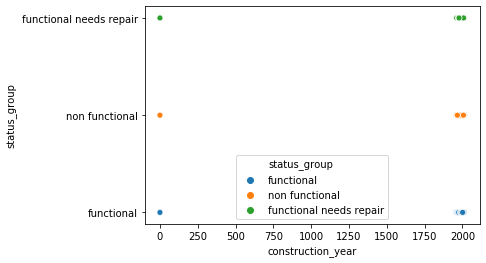

In [126]:

sns.scatterplot(x='construction_year', y='status_group', data=df, hue='status_group') 
alpha=0.3

In [129]:
df['construction_year'].value_counts().unique()

array([20709,  2645,  2613,  2533,  2091,  1587,  1471,  1286,  1256,
        1123,  1084,  1075,  1037,  1014,  1011,   979,   966,   954,
         945,   811,   779,   744,   738,   708,   676,   644,   640,
         608,   540,   521,   488,   437,   434,   414,   411,   324,
         316,   302,   238,   202,   192,   184,   176,   145,   102,
          88,    85,    77,    59,    40,    30,    21,    19,    17])